# Tarea 1 parte 1 
### Escoger un dataset y descirbirlo

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import mplfinance as mpf


### Datos 
## Temperatura debajo del agua de la costa brazilera
El conjunto de datos seleccionado [temperatura_debajo_del_agua](https://www.kaggle.com/datasets/shivamb/underwater-surface-temperature-dataset), es un conjunto de datos sobre la temperatura en el mar de diferentes islas y putos rocosos en las costa de Brazil.

In [4]:
data = pd.read_csv(r"C:\Users\claud\OneDrive - Universidad del Norte\Escritorio\underwater_temperature.csv")

data.head()

,ID,Site,Latitude,Longitude,Date,Time,Temp (°C),Depth
0,1,Ilha Deserta,27.2706,48.331,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.331,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.331,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.331,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.331,2013/02/20,13:00:06,24.351,12.0


In [5]:
data['Site'].unique()


array(['Ilha Deserta', 'Ilha da Galé', 'Ilha do Coral', 'Ilha dos Lobos',
       'Moleques do Sul', 'Parcel da Pombinha',
       'Parcel do Xavier (Alalunga)', 'Tamboretes', 'lha do Xavier'],
      dtype=object)

In [6]:
data.describe()

,ID,Latitude,Longitude,Temp (°C),Depth
count,408638.000000,408638.000000,408638.000000,408634.000000,408638.000000
mean,204319.500000,27.385022,48.432279,20.759051,12.010513
std,117963.773988,0.509617,0.096028,2.980158,6.177916
min,1.000000,26.367900,48.331000,14.421000,5.000000
25%,102160.250000,27.180400,48.385800,18.236000,5.000000
50%,204319.500000,27.270600,48.408000,20.615000,12.000000
75%,306478.750000,27.611100,48.522000,23.100000,12.000000
max,408638.000000,28.446100,48.708700,29.252000,22.100000


Los datos representa las temperatura en grados centigrados de 7 islas y 2 arrecifes de la costa de Brazil. Las mediciones se hicieron cada 20 minutos, en profundidades entre 5 y 22,la temperatura promedio es de 20.7
Las variables identificadas son la locación que va ligada a la longitud y la latitud, la fecha, la hora y finalmente la profundidad 

### Gráfica de temperatura en el tiempo

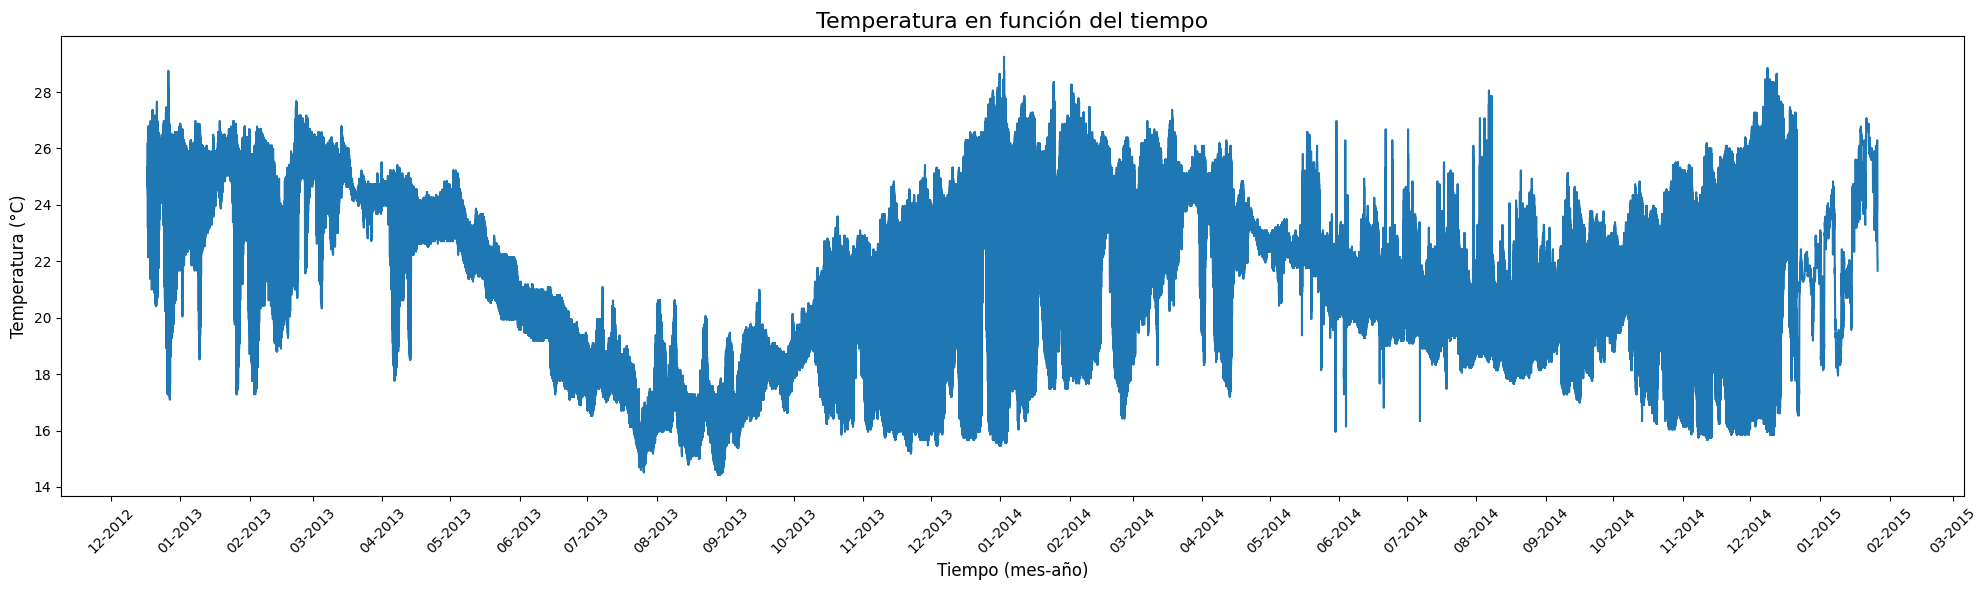

In [7]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


plt.figure(figsize=(20, 6))
sns.lineplot(x=data['DateTime'], y=data['Temp (°C)'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))  
plt.title('Temperatura en función del tiempo', fontsize=16)
plt.xlabel('Tiempo (mes-año)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La mediciones empezaron en diciembre del 2012 y terminaron en marzo del 2015. 
De la gráfica podemos identificar en la mitad del año, entre los meses de junio y agosto la temperatura del oceano baja. Para observar de manera más clara esta tendencia haremos una grafica para cada una de las islas 

### Gráficas por Isla

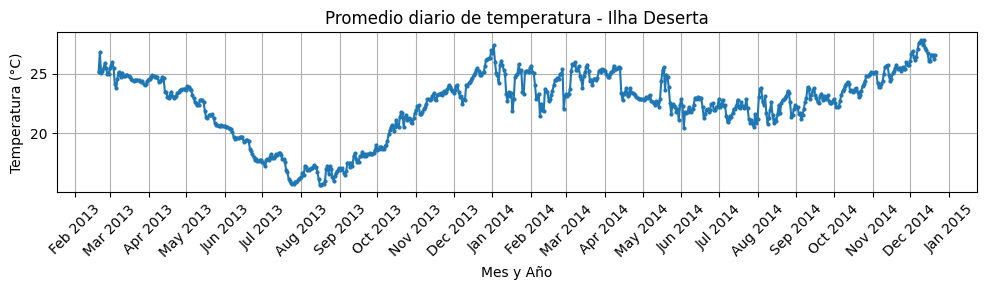

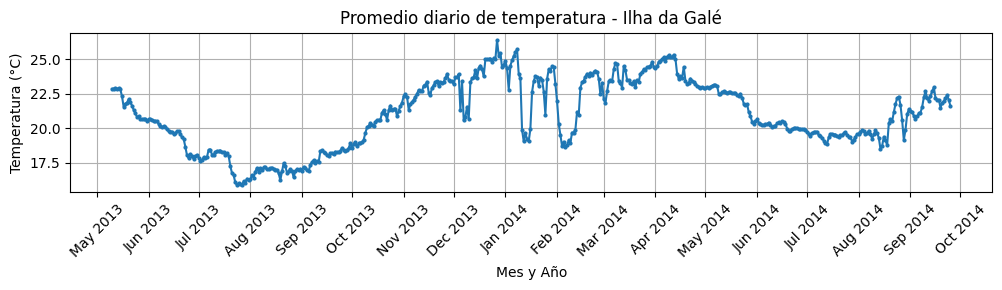

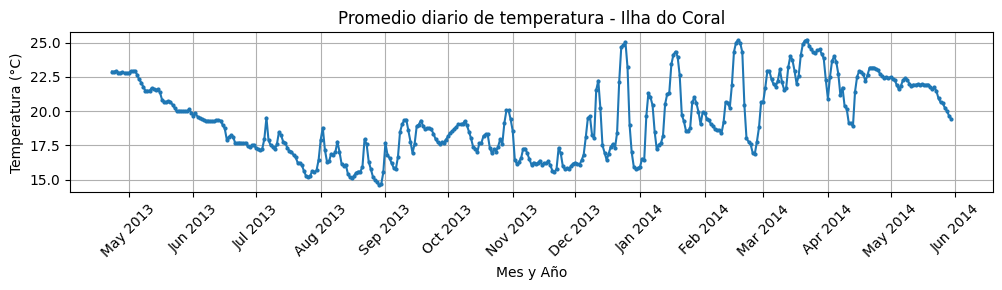

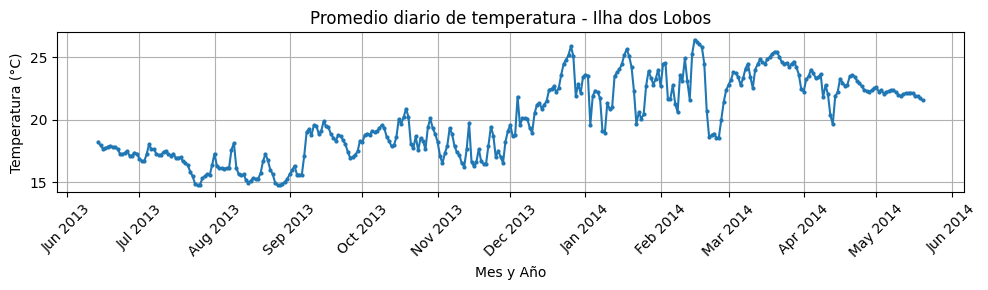

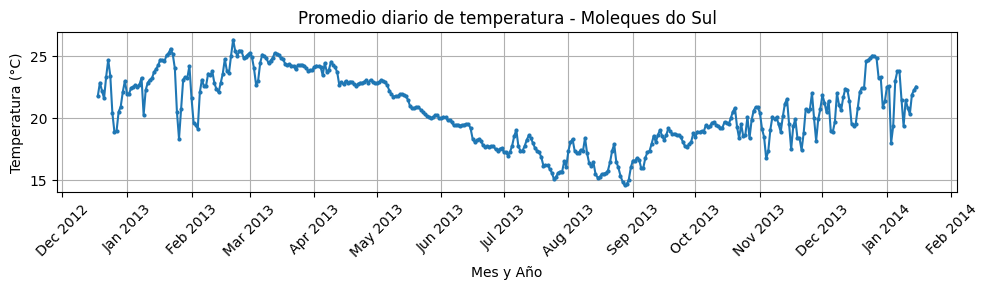

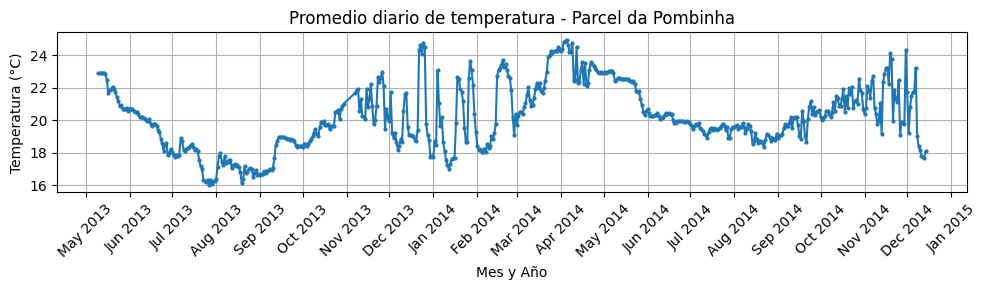

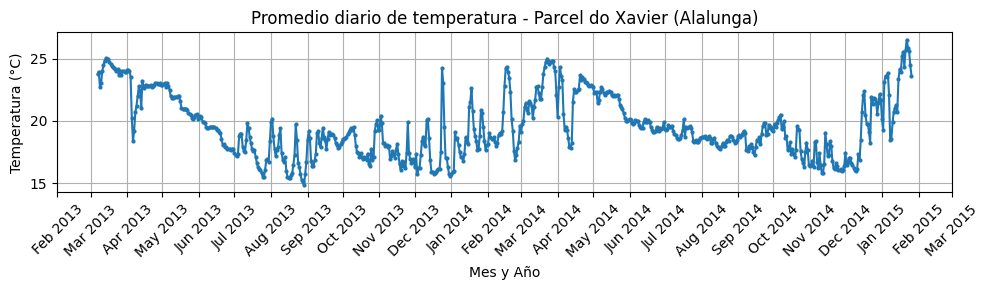

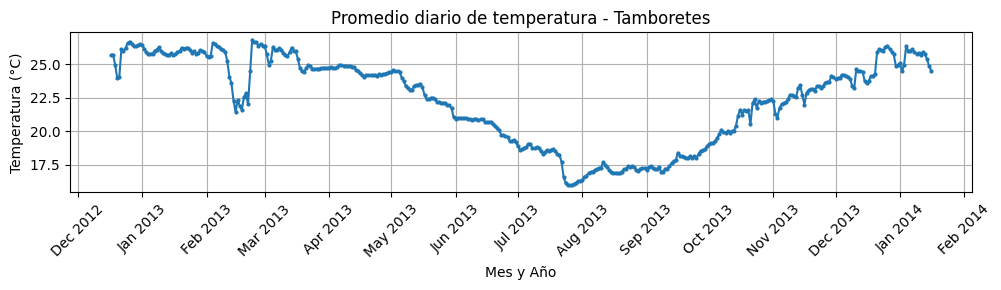

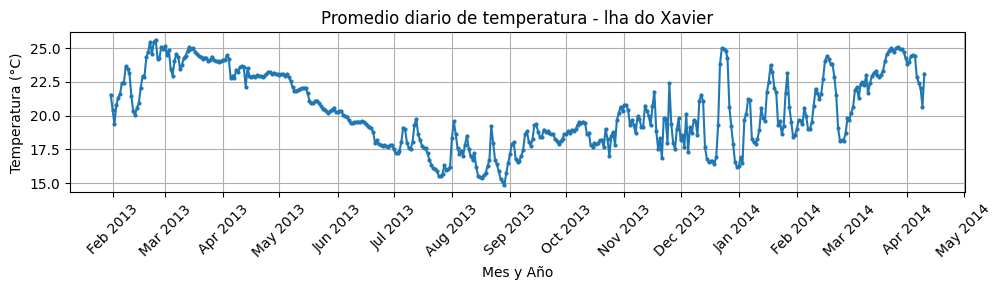

In [23]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

daily_avg_temp = data.groupby(['Site', 'Date'])['Temp (°C)'].mean().reset_index()
sites = daily_avg_temp['Site'].unique()

for site in sites:
    site_data = daily_avg_temp[daily_avg_temp['Site'] == site]
    plt.figure(figsize=(10, 3))
    
    
    plt.plot(site_data['Date'], site_data['Temp (°C)'], marker='o',markersize=2)
    plt.title(f'Promedio diario de temperatura - {site}')
    plt.xlabel('Mes y Año')
    plt.ylabel('Temperatura (°C)')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Después de ver los datos de cada una de las islas podemos identificar que se cumple la tendencia de que en los meses de la mitad del año la temperatura baja y en los extremos aumenta. 
Tambien es posible evaluar si existen tendencias o cilos relacionados con la hora y la profudidad a la que se toma la medida 